**Import Libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

**Mount The Google Drive**

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load The Stock Price Data**

In [73]:
# CSV file with stock data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock Prices/Stock Price Combank.csv')

# Display the first few rows of the dataframe
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/22/2024,91.6,91.1,91.6,90.9,180.10K,0.55%
1,02/21/2024,91.1,91.0,91.4,90.6,255.22K,0.11%
2,02/20/2024,91.0,91.1,91.5,90.3,128.71K,0.00%
3,02/19/2024,91.0,90.0,91.5,89.6,434.43K,1.22%
4,02/16/2024,89.9,89.0,90.0,89.0,169.15K,0.45%


In [74]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1158,03/01/2019,88.11,90.67,90.67,87.85,67.67K,-2.27%
1159,02/28/2019,90.16,91.53,91.53,89.82,407.45K,-1.40%
1160,02/27/2019,91.44,92.30,92.39,91.10,11.98K,-0.93%
1161,02/26/2019,92.30,91.70,92.39,91.10,14.20K,1.80%
1162,02/25/2019,90.67,92.21,92.21,89.82,134.06K,-1.04%


**Data preprocessing**

In [76]:
# Select the 'Price' column as the target variable
data = df['Price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for LSTM
sequence_length = 10  # You can adjust this based on your preference
X, y = [], []

for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i+sequence_length, 0])
    y.append(data_normalized[i+sequence_length, 0])

X, y = np.array(X), np.array(y)

# Reshape data for LSTM input (batch_size, timesteps, input_dim)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


**Split The Data Into Training And Testing Sets**

In [77]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


**Build The LSTM Model**

In [78]:
# Define hyperparameters
epochs = 20  # You can adjust this based on your preference
batch_size = 32  # You can adjust this based on your preference

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/20
29/29 [==============================] - 3s 7ms/step - loss: 0.0403
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 3/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 4/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 5/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 6/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 8/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 9/20
29/29 [==============================] - 0s 13ms/step - loss: 0.0026
Epoch 10/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 11/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 12/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 13/20
29/29 [========================

**Make Predictions And Evaluate The Model**

In [79]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform for original scale
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print('Root Mean Squared Error (RMSE):', rmse)


8/8 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 1.5314612999665171


**Visualize The Results**

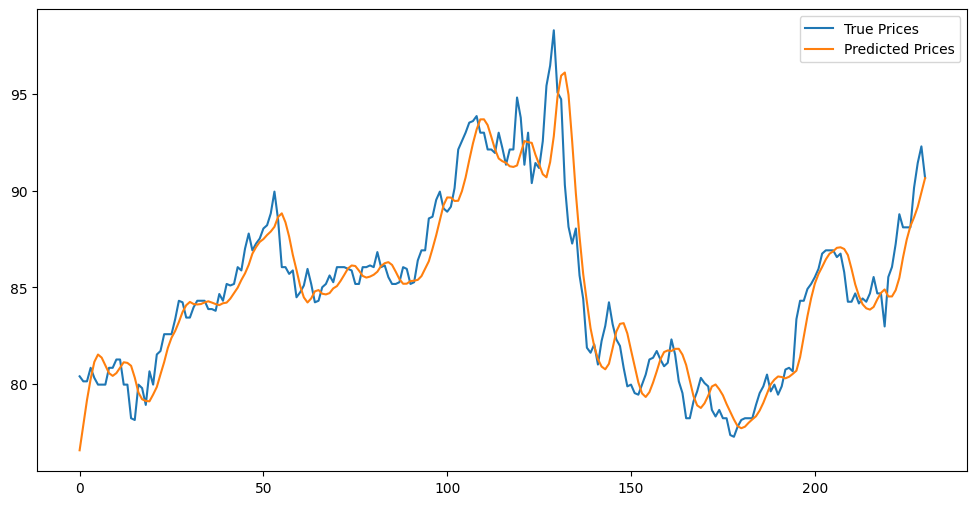

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()
